## Richter's Predictor: Modeling Earthquake Damage

The April 2015 earthquake with a magnitude of 7.8Mw in Nepal(aka Gorkha earthquake) had nearly 9,000 causalties and injured almost 22,000 people. Experts had long warned of the possible damages from deadly earthquakes in Nepal due to its geology, architecture and other factors. Many centuries-old buildings that were a UNESCO World Heritage Site were destroyed.

In this challenge, we will be predicting the level of damage to buildings ('damage grade'), on a scale of 1-3, with 1 being the lowest grade. This is a multiclass classification problem where we will solve by using logistic regression.

This is part of a Driven Data competition: https://www.drivendata.org/competitions/57/nepal-earthquake/

Feature descriptions can be found here: https://www.drivendata.org/competitions/57/nepal-earthquake/page/136/

In [1]:
#import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting

%matplotlib inline

import warnings # hide warning messages
warnings.filterwarnings('ignore')

### Load Datasets

In [2]:
train = pd.read_csv('train_values.csv')
label = pd.read_csv('train_labels.csv')
test = pd.read_csv('test_values.csv')

In [3]:
#displays all columns
pd.set_option('display.max_columns', 80)
train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


##### Quick glances with statistical summary

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [6]:
train.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 39 columns):
building_id                               86868 non-null int64
geo_level_1_id                            86868 non-null int64
geo_level_2_id                            86868 non-null int64
geo_level_3_id                            86868 non-null int64
count_floors_pre_eq                       86868 non-null int64
age                                       86868 non-null int64
area_percentage                           86868 non-null int64
height_percentage                         86868 non-null int64
land_surface_condition                    86868 non-null object
foundation_type                           86868 non-null object
roof_type                                 86868 non-null object
ground_floor_type                         86868 non-null object
other_floor_type                          86868 non-null object
position                                  86868 non-null object
pla

In [8]:
test.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,8.686800e+04,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000
mean,5.266279e+05,13.888198,704.128125,6261.758565,2.133145,26.550168,8.013906,5.436098,0.089953,0.762502,0.034466,0.018568,0.067459,0.073836,0.253534,0.083679,0.042501,0.015794,0.015207,0.983112,0.111468,0.064097,0.033867,0.008242,0.001013,0.000368,0.001002,0.000104,0.000115,0.000046,0.004904
std,3.037828e+05,8.029576,413.364015,3648.712191,0.728047,73.413489,4.377899,1.906950,0.286115,0.425552,0.182424,0.134996,0.250816,0.261506,0.435036,0.276907,0.201731,0.124679,0.122376,0.422363,0.314713,0.244928,0.180889,0.090413,0.031812,0.019190,0.031631,0.010178,0.010729,0.006786,0.069857
min,7.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.644215e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.269835e+05,12.000000,709.000000,6276.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.890842e+05,21.000000,1054.000000,9416.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052923e+06,30.000000,1427.000000,12567.000000,8.000000,995.000000,92.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


There seems to be no missing values in the training or testing set because every column has the same amount of rows as the total rows.  

We can now create a new dataframe with the training values and training labels combined.

In [9]:
train_df = pd.merge(train, label, how='inner', on='building_id')

In [10]:
train_df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


### EDA

Before looking at the dataset, we will check to see if the labels we are trying to predict is imbalanced.

In [11]:
train_df['damage_grade'].value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

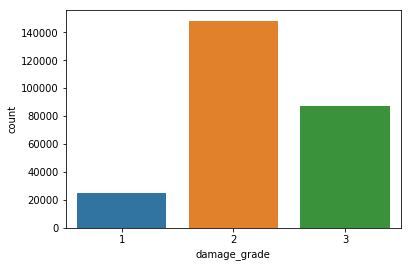

In [12]:
sns.countplot('damage_grade', data=train_df)

Damage grade 2 is the most common with 1 being the least.  

Now we will examine the correlation between the variables with a single graph.

In [13]:
train_df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,1,-0.0028,0.00035,-0.00039,-0.00065,-0.0015,-0.0021,9.6e-05,-0.00031,0.0024,0.0014,-0.00083,-0.0038,0.0019,0.002,0.0013,0.0025,-0.0023,0.0022,-0.0006,0.0026,0.0026,0.0019,-0.0022,0.00071,-0.00036,0.0023,-0.00037,0.00054,-0.0031,-0.0023,0.0011
geo_level_1_id,-0.0028,1,-0.061,0.0027,-0.089,-0.0039,0.071,-0.063,-0.018,-0.15,0.0077,0.024,-0.029,0.13,0.14,0.074,0.016,0.016,0.023,0.035,-0.01,-0.02,0.0019,0.024,0.0037,0.003,0.0027,-0.0023,0.0011,0.00052,-0.018,-0.072
geo_level_2_id,0.00035,-0.061,1,0.00092,0.048,0.013,-0.049,0.036,0.016,0.076,-0.0087,-0.0091,0.014,-0.08,-0.024,-0.033,-0.038,-0.036,-0.02,-0.012,-0.0015,0.018,-0.0084,-0.031,-0.0048,-0.0049,0.00069,-0.00076,-0.00015,0.0019,-0.013,0.043
geo_level_3_id,-0.00039,0.0027,0.00092,1,-0.022,-0.0064,-0.0056,-0.025,-0.016,0.026,0.02,0.006,-0.023,-0.0051,-0.0039,0.0061,0.0023,-0.012,-0.011,-0.0025,0.0074,0.016,-0.002,-0.0074,-0.0071,-0.0044,-0.00086,-0.0026,-0.00094,0.00027,-0.0025,0.0079
count_floors_pre_eq,-0.00065,-0.089,0.048,-0.022,1,0.087,0.1,0.77,0.17,-0.027,-0.041,-0.011,0.26,-0.086,-0.057,-0.07,0.0074,0.049,-0.03,0.087,0.052,-0.0053,0.077,0.035,0.016,0.0088,-0.0026,0.0068,0.0096,0.0039,-0.0021,0.12
age,-0.0015,-0.0039,0.013,-0.0064,0.087,1,-0.0043,0.061,0.068,0.0013,0.0091,-0.012,0.08,-0.037,0.0059,-0.0084,-0.025,-0.026,-0.0015,0.0053,-0.0088,-0.0022,-0.01,0.0012,-0.0042,-0.0035,-0.0037,-0.0022,-0.0018,-0.0012,-0.0045,0.029
area_percentage,-0.0021,0.071,-0.049,-0.0056,0.1,-0.0043,1,0.2,0.026,-0.23,-0.00047,0.074,0.053,0.21,-0.054,-0.032,0.19,0.22,0.0079,0.089,0.12,-0.016,0.16,0.11,0.052,0.05,0.019,0.015,0.015,0.005,0.013,-0.13
height_percentage,9.6e-05,-0.063,0.036,-0.025,0.77,0.061,0.2,1,0.15,-0.11,-0.02,0.013,0.21,0.0017,-0.052,-0.063,0.086,0.13,-0.019,0.064,0.092,-0.0054,0.12,0.069,0.031,0.02,0.0019,0.011,0.015,0.004,0.0054,0.048
has_superstructure_adobe_mud,-0.00031,-0.018,0.016,-0.016,0.17,0.068,0.026,0.15,1,-0.31,0.007,-0.015,0.31,-0.038,0.012,0.012,-0.037,-0.037,0.058,0.033,-0.013,-0.0039,-0.013,-0.0039,-0.0043,-0.0024,0.0018,-0.0033,-0.0026,-0.0015,-0.01,0.055
has_superstructure_mud_mortar_stone,0.0024,-0.15,0.076,0.026,-0.027,0.0013,-0.23,-0.11,-0.31,1,-0.034,-0.1,-0.38,-0.47,-0.04,-0.055,-0.22,-0.22,-0.042,0.0016,-0.088,0.058,-0.16,-0.12,-0.036,-0.023,-0.026,-0.0088,-0.012,-0.0034,0.0056,0.29


The column with the highest correlation to 'damage_grade', our label, is 'has_structure_mud_mortar_stone' with a value of only 0.29. One of the highest correlations (0.77) is between the columns 'height_percentage' and 'count_floors_pre_eq'. Let's plot those on a scatter plot to see the relationship visually.

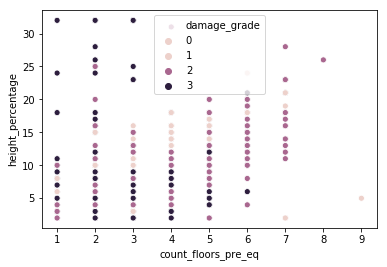

In [14]:
sns.scatterplot(y='height_percentage', x='count_floors_pre_eq', hue='damage_grade', data=train_df)

Let's see if the 'has_secondary_use' column is correlated with the other 'has_secondary_use' columns because it might just be a broader column than the other ones.

In [15]:
train_df.filter(like='has_secondary', axis=1).corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
has_secondary_use,1,0.74,0.53,0.25,0.086,0.054,0.092,0.039,0.034,0.026,0.2
has_secondary_use_agriculture,0.74,1,-0.049,-0.024,-0.008,-0.005,-0.0086,-0.0036,-0.0032,-0.0025,0.085
has_secondary_use_hotel,0.53,-0.049,1,-0.017,-0.0057,-0.0035,-0.0061,-0.0026,-0.0023,-0.0018,0.0039
has_secondary_use_rental,0.25,-0.024,-0.017,1,-0.0028,-0.0017,-0.003,-0.0012,-0.0011,-0.00085,0.0025
has_secondary_use_institution,0.086,-0.008,-0.0057,-0.0028,1,-0.00058,-0.001,-0.00042,-0.00037,-0.00029,0.0048
has_secondary_use_school,0.054,-0.005,-0.0035,-0.0017,-0.00058,1,-0.00062,-0.00026,-0.00023,-0.00018,0.0015
has_secondary_use_industry,0.092,-0.0086,-0.0061,-0.003,-0.001,-0.00062,1,-0.00045,-0.0004,-0.00031,0.0042
has_secondary_use_health_post,0.039,-0.0036,-0.0026,-0.0012,-0.00042,-0.00026,-0.00045,1,-0.00017,-0.00013,-0.00098
has_secondary_use_gov_office,0.034,-0.0032,-0.0023,-0.0011,-0.00037,-0.00023,-0.0004,-0.00017,1,-0.00011,0.0036
has_secondary_use_use_police,0.026,-0.0025,-0.0018,-0.00085,-0.00029,-0.00018,-0.00031,-0.00013,-0.00011,1,-0.00067


There does not actually seem to be very high correlation between any of them except for 'has_secondary_use' and 'has_secondary_use_agriculture'.  

Columns with different data types will need to be manipulated differently. Thus we will create different lists for the categories of data types to make them easier to use.

In [16]:
# continuous or discrete numeric features
num_features = ['count_floors_pre_eq', 'age', 'area_percentage',
       'height_percentage','count_families']

# categorical features
cat_features = ['land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration','legal_ownership_status']

# binary features
binary_features = ['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick',
       'has_superstructure_timber', 'has_superstructure_bamboo',
       'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other','has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']

In [17]:
# function to create count plots
def count_plots(nrows, ncols, feat_list):
    fig, axes = plt.subplots(nrows=nrows, ncols= ncols, figsize=(18,24))
    axes_list = [item for sublist in axes for item in sublist]
    
    for col in feat_list:
        ax = axes_list.pop(0)
        sns.countplot(col, hue='damage_grade', data=train_df, ax=ax)
        ax.legend(loc='upper right', title='damage grade')
    # prevents overlapping
    plt.tight_layout()
    # removes unused subplots
    for ax in axes_list:
        ax.remove()

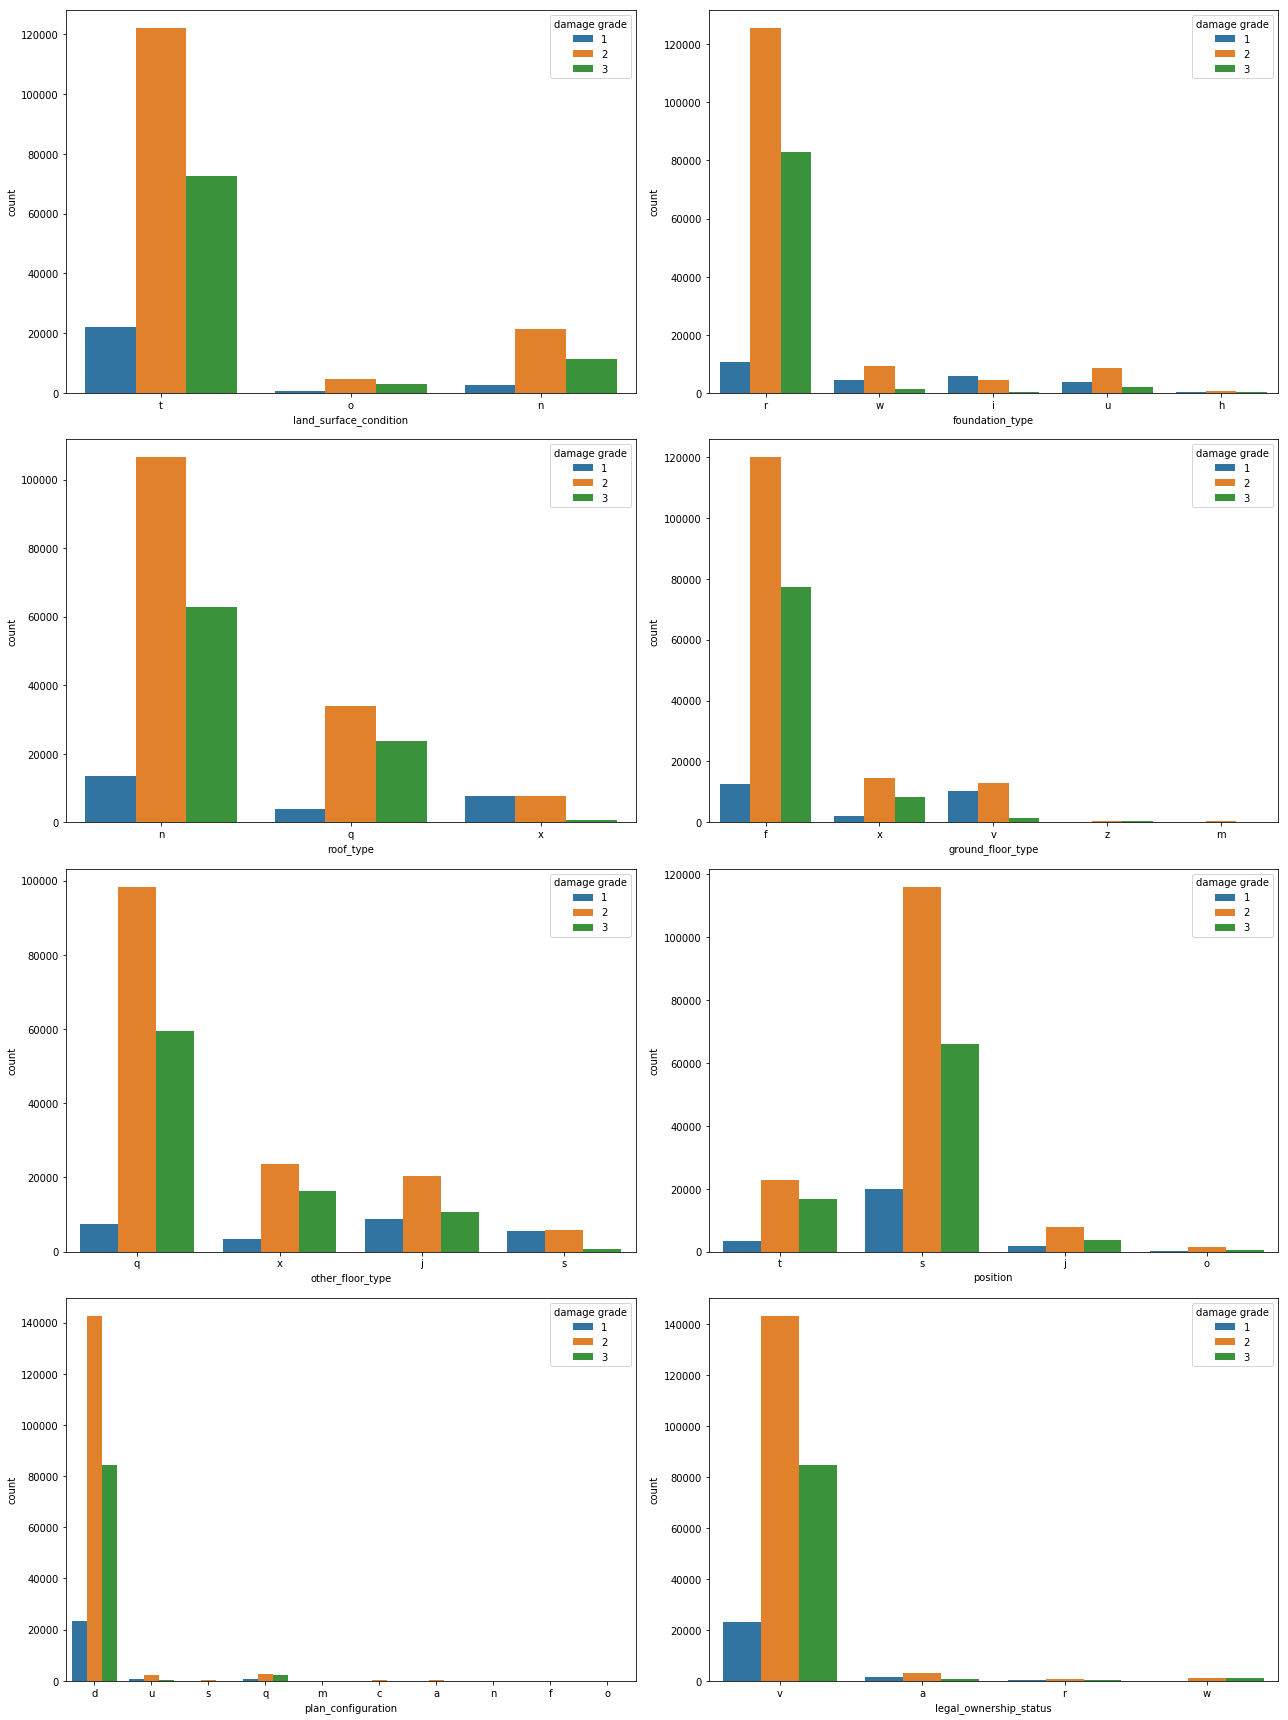

In [18]:
count_plots(4,2,cat_features)

In each categorical column, the count graph is showing some values have significantly more counts than the other. A quick value_counts() of each column can reveal if there is any imbalanced classes.

In [19]:
for col in cat_features:
    print(col)
    print(train_df[col].value_counts())
    print('\n')

land_surface_condition
t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64


foundation_type
r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64


roof_type
n    182842
q     61576
x     16183
Name: roof_type, dtype: int64


ground_floor_type
f    209619
x     24877
v     24593
z      1004
m       508
Name: ground_floor_type, dtype: int64


other_floor_type
q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64


position
s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64


plan_configuration
d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64


legal_ownership_status
v    250939
a      5512
w      2677
r      1473
Name: legal_ownership_status, dtype: int64




All the columns have some imbalance in the values where one value dominates the total amount.

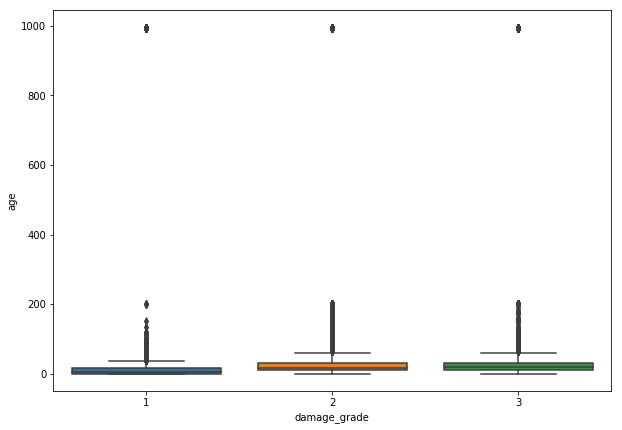

In [20]:
plt.figure(figsize=(10,7))
sns.boxplot(x='damage_grade', y='age', data=train_df)

Something funky is happening with the age column. It seems to have outliers that are way higher than the rest. Let's check it out with value counts.  

On the graph, it shows that the majority age are less than 300 and the outliers are all near 1000. Therefore, we will filter out the 'age' coulmn to return only values higher than 400.

In [21]:
train_df[train_df['age']> 400]['age'].value_counts()

995    1390
Name: age, dtype: int64

The test dataset could have the same issue.

In [22]:
test[test['age']>400]['age'].value_counts()

995    461
Name: age, dtype: int64

Since the outliers are all the same value and it is so much higher than the rest, we will do some research to see if there truly were buildings about 995 years old in Nepal that was damaged.  

Helpful website: https://www.frontiersin.org/articles/10.3389/fbuil.2015.00008/full

https://www.scmp.com/magazines/post-magazine/article/1880561/restoring-nepals-earthquake-hit-monuments-race-against-time

https://www.nationalgeographic.com/news/2015/04/150427-nepal-earthquake-damage-temples-buddhism-hinduism-world-heritage-monuments-unesco/#close

https://www.frontiersin.org/articles/10.3389/fbuil.2017.00062/full

After reading through various articles, many confirmed that although some buildings were first constructed in the 4th and 5th century (around 300-500AD), many were destroyed in the 1934 earthquake and reconstructed at a later date. The oldest building was said to be about 875 years old. The buildings with 995 as their age could be a typo.  

Since we have a large dataset of about 260000 rows and there are about 1400 of the outlier value, we will simply drop rows where the age is greater than 800.

In [23]:
train_df = train_df[train_df['age'] < 800]
train_df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [24]:
test = test[test['age']< 800]
test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


A boxplot will be created again to check on the changes.

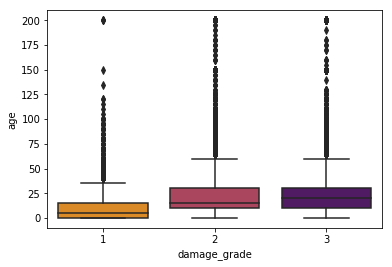

In [25]:
sns.boxplot(x='damage_grade', y='age', data=train_df, palette='inferno_r')

Much better! Now let's have a look at a bar graph of 'age' and 'damage_grade' to visualize the average for the three categories.

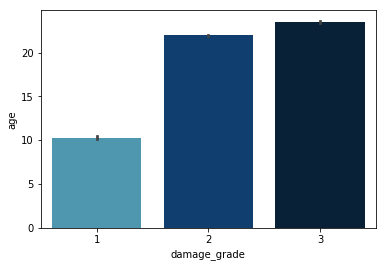

In [26]:
sns.barplot(x='damage_grade', y='age', data=train_df, palette='ocean_r')

From the bar graph, we can see that buildings labeled with grade 1 damage is on average younger and the damage grade increases with age. This makes sense since older buildings are more likely to not be up to standard with the building codes.  
Let's take a look at the other numeric features in a histogram plot.

In [27]:
# function to create box plots
def bar_plots(nrows, ncols, feat_list):
    fig, axes = plt.subplots(nrows=nrows, ncols= ncols, figsize=(20,15))
    axes_list = [item for sublist in axes for item in sublist]
    
    for col in feat_list:
        ax = axes_list.pop(0)
        sns.barplot(x='damage_grade', y=col, data=train_df, ax=ax)
    # prevents overlapping
    plt.tight_layout()
    # removes unused subplots
    for ax in axes_list:
        ax.remove()

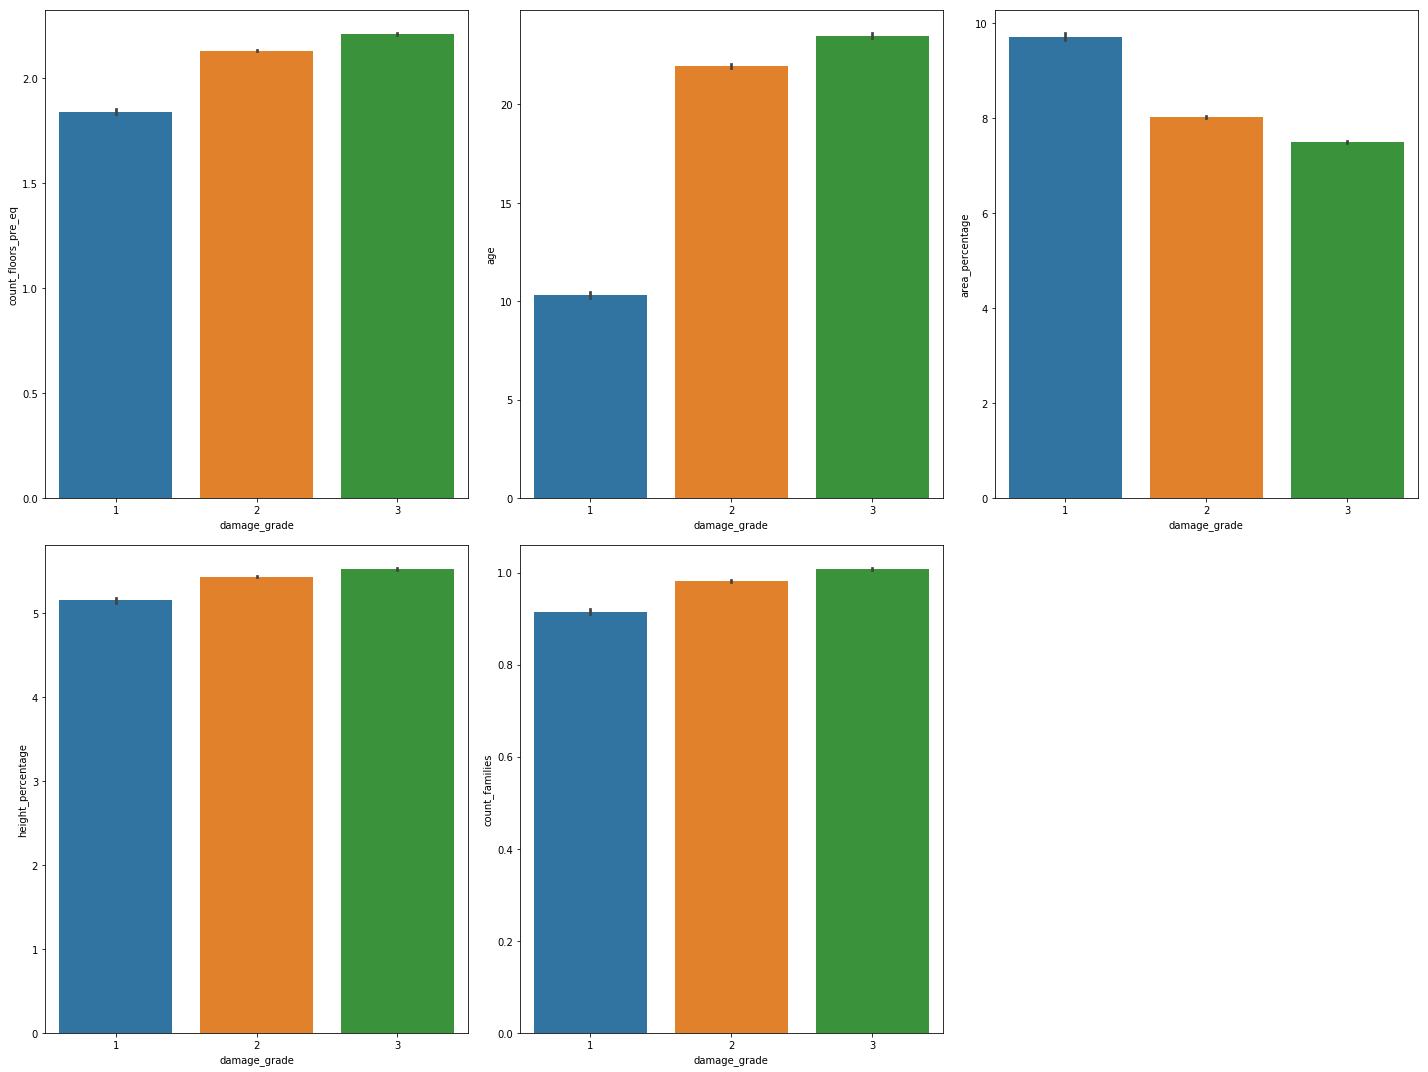

In [28]:
bar_plots(2,3,num_features)

### Data Preprocessing

In [29]:
train_final = pd.get_dummies(train_df[cat_features])
test_final = pd.get_dummies(test[cat_features])

print(train_final.shape)
print(test_final.shape)

(259211, 38)
(86407, 38)


In [30]:
features = np.concatenate([train_final, np.array(train_df[binary_features]), np.array(train_df[num_features])], axis=1)
print('training features shape: ', features.shape)

test_features = np.concatenate([test_final, np.array(test[binary_features]), np.array(test[num_features])], axis=1)
print('test features shape: ', test_features.shape)

training features shape:  (259211, 65)
test features shape:  (86407, 65)


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(features[:,-5:])
features[:,-5:] = scaler.transform(features[:,-5:])

test_features[:,-5:] = scaler.transform(test_features[:,-5:])

print(features[:5])
print(test_features[:5])

[[0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
  1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
  1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
  1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
  1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
  1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0]]
[[ 0  0  1  0  0  1  0  0  1  0  0  1  0  0  0  0  0  1  0  0  0  0  1  0
   0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  1  0  0  1  0  0  1  0  0  1  0  0  0  0  0  1  0  0  0  0  1  0
   0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  

##### Train/Test Split

In [32]:
from sklearn.model_selection import train_test_split

X = features
y = np.array(train_df['damage_grade'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)
print(x_train.shape)
print(x_test.shape)

(181447, 65)
(77764, 65)


### Logistic Regression

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [34]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver='sag', multi_class='multinomial')
LR.fit(x_train, y_train)

LR_result = LR.predict(x_test)

In [35]:
print(LR.intercept_)
print(LR.coef_[:1,:])

[-0.0850158   0.42037046 -0.33535466]
[[-6.40805532e-03 -1.44634381e-01  1.05430456e-01  1.43586594e-01
   2.79936010e-01 -4.20952327e-01 -2.75685357e-01  2.27503100e-01
   5.56052751e-03 -2.76076312e-01  2.24903803e-01 -1.68658537e-01
  -1.26027115e-02  2.90311970e-01 -1.25545479e-01 -2.91172230e-02
  -8.01359142e-02 -9.72439575e-02  1.66088527e-01 -3.43206364e-02
   2.02066746e-02 -5.80492671e-02  1.60855350e-01 -1.68624738e-01
   1.58429472e-01  1.64143059e-01 -1.88036991e-01 -4.68048171e-01
   3.45717380e-01 -7.40243385e-02  2.88867833e-01 -2.79892727e-01
  -9.59239535e-02  1.03156456e-01  1.52850812e-01 -5.96372621e-03
   8.42571860e-02 -2.76756253e-01 -8.16366632e-01 -9.24778989e-01
  -1.33818628e+00 -4.98606686e-02 -6.37263083e-01  3.05491323e-01
   2.87225057e-01 -8.23518417e-03  1.40787989e-01  5.70673623e-01
   3.27418617e-01 -1.12985900e-01 -1.00508285e-01  2.42571037e-01
   6.25337852e-01  4.36676541e-01 -4.95854026e-02  2.32449806e-01
   3.29988460e-01  2.88732896e-01 -1.6

In [36]:
print(classification_report(y_test, LR_result))
print(accuracy_score(y_test, LR_result))

             precision    recall  f1-score   support

          1       0.60      0.32      0.41      7441
          2       0.60      0.88      0.71     44288
          3       0.54      0.18      0.27     26035

avg / total       0.58      0.59      0.53     77764

0.5920991718532997


In [37]:
def con_matrix(actual, predicted):
    matrix = confusion_matrix(actual, predicted)
    matrix = pd.DataFrame(matrix, index=['a1','a2','a3'], columns=['p1','p2','p3'])
    return matrix

In [38]:
con_matrix(y_test, LR_result)

,p1,p2,p3
a1,2348,4969,124
a2,1407,39125,3756
a3,126,21338,4571


### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

dtc_result = dtc.predict(x_test)

In [41]:
print(classification_report(y_test, dtc_result))
print(accuracy_score(y_test, dtc_result))

             precision    recall  f1-score   support

          1       0.49      0.38      0.43      7441
          2       0.61      0.79      0.69     44288
          3       0.52      0.30      0.38     26035

avg / total       0.57      0.58      0.56     77764

0.5846278483617098


In [42]:
con_matrix(y_test, dtc_result)

,p1,p2,p3
a1,2835,4186,420
a2,2563,34859,6866
a3,397,17869,7769


The f1-score for labeling damage_grade 3 went up compared to simple logistic regression, however, the other labels experienced a decrease.

In [43]:
# from IPython.display import Image
# from sklearn.externals.six import StringIO
# from sklearn.tree import export_graphviz
# import pydot

# dot_data = StringIO()
# export_graphviz(dtc, out_file=dot_data, feature_names=col_names, filled=True, rounded=True)

# graph = pydot.graph_from_dot_data(dot_data.get_value())
# Image(graph[0].create_png())

### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

/Users/cindywong/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [45]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

rfc_result = rfc.predict(x_test)

In [46]:
print(classification_report(y_test, rfc_result))
print(accuracy_score(y_test, rfc_result))

             precision    recall  f1-score   support

          1       0.57      0.36      0.44      7441
          2       0.62      0.81      0.70     44288
          3       0.53      0.31      0.39     26035

avg / total       0.59      0.60      0.57     77764

0.5991975721413507


In [47]:
con_matrix(y_test, rfc_result)

,p1,p2,p3
a1,2682,4393,366
a2,1795,35772,6721
a3,226,17667,8142


### KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

knn_result = knn.predict(x_test)

In [50]:
print(classification_report(y_test, knn_result))
print(accuracy_score(y_test, knn_result))

             precision    recall  f1-score   support

          1       0.49      0.39      0.43      7441
          2       0.61      0.68      0.64     44288
          3       0.46      0.39      0.42     26035

avg / total       0.55      0.56      0.55     77764

0.5566971863587264


In [51]:
con_matrix(y_test, knn_result)

,p1,p2,p3
a1,2901,3919,621
a2,2640,30221,11427
a3,415,15451,10169


### Naive Bayes Multinomial

In [52]:
NB_feat = np.concatenate([train_final, np.array(train_df[binary_features]), np.array(train_df[num_features])], axis=1)
print('training features shape: ', NB_feat.shape)

test_NB_feat = np.concatenate([test_final, np.array(test[binary_features]), np.array(test[num_features])], axis=1)
print('test features shape: ', test_NB_feat.shape)

training features shape:  (259211, 65)
test features shape:  (86407, 65)


In [53]:
from sklearn.model_selection import train_test_split

NB_X = NB_feat
NB_y = np.array(train_df['damage_grade'])

NBx_train, NBx_test, NBy_train, NBy_test = train_test_split(NB_X, NB_y, test_size=0.3, random_state=111)
print(NBx_train.shape)
print(NBx_test.shape)

(181447, 65)
(77764, 65)


In [54]:
NBx_train

array([[ 0,  0,  1, ..., 16,  5,  1],
       [ 0,  0,  1, ...,  7,  5,  1],
       [ 0,  0,  1, ..., 14,  7,  1],
       ...,
       [ 0,  0,  1, ...,  9,  7,  0],
       [ 0,  0,  1, ...,  3,  6,  1],
       [ 0,  0,  1, ...,  3,  5,  1]])

In [55]:
from sklearn.naive_bayes import MultinomialNB

In [56]:
NB = MultinomialNB()
NB.fit(NBx_train, NBy_train)

NB_result = NB.predict(NBx_test)

In [57]:
print(classification_report(y_test, NB_result))
print(accuracy_score(y_test, NB_result))

             precision    recall  f1-score   support

          1       0.27      0.66      0.39      7441
          2       0.60      0.47      0.53     44288
          3       0.43      0.42      0.42     26035

avg / total       0.51      0.47      0.48     77764

0.4703461756082506


In [58]:
con_matrix(y_test,NB_result)

,p1,p2,p3
a1,4908,2005,528
a2,9482,20699,14107
a3,3458,11608,10969
